In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [69]:
data = pd.read_csv("train.csv")

In [71]:
def HandleMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKNOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values, inplace=True)

def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df, columnsToEncode):
    return pd.get_dummies(df, columns=columnsToEncode)

In [72]:
HandleMissingValues(data)
cat_cols = getObjectColumnsList(data)
data = PerformOneHotEncoding(data, cat_cols)

In [100]:
train, test = train_test_split(data, train_size=0.8, random_state=98987)

In [101]:
def split_x_y(df):
    y = df['SalePrice']
    X = df.drop(['Id', 'SalePrice'], axis=1)
    return X.to_numpy(), y.to_numpy(float)

In [102]:
X_train, y_train = split_x_y(train)
X_test, y_test = split_x_y(test)
y_train = np.log1p(y_train)

In [103]:
model_xgb = xgb.XGBRegressor(n_estimators=340, max_depth=10, learning_rate=0.2)
model_xgb.fit(X_train, y_train)
xgb_preds = model_xgb.predict(X_test)

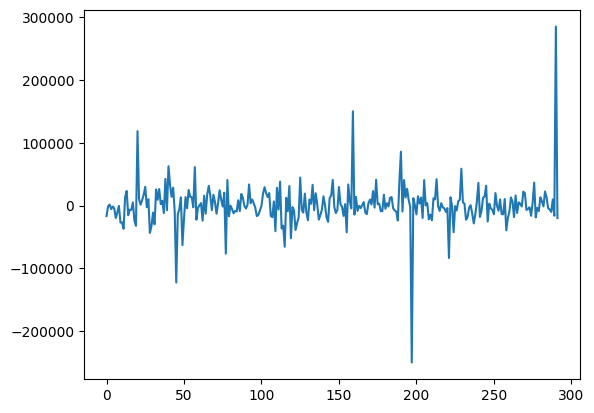

In [104]:
plt.plot(np.exp(xgb_preds) -  1 - y_test)

In [107]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)

In [113]:
test.iloc[-2]

Id                         524.0
MSSubClass                  60.0
LotFrontage                130.0
LotArea                  40094.0
OverallQual                 10.0
                          ...   
SaleCondition_AdjLand        0.0
SaleCondition_Alloca         0.0
SaleCondition_Family         0.0
SaleCondition_Normal         0.0
SaleCondition_Partial        1.0
Name: 523, Length: 306, dtype: float64

In [116]:
diff = np.exp(xgb_preds) -  1 - y_test
print(np.mean(diff), np.sqrt(np.mean((diff - np.mean(diff))**2)))

855.7861461900685 33384.49235964126
